<a href="https://colab.research.google.com/github/MadBunny999/Practice-ML-DEV/blob/master/cases/case_4/case4_ML_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import warnings
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [215]:
warnings.filterwarnings('ignore')

SEED = 97

random.seed(SEED)

SEQN - порядковый номер респондента

age_group - таргет/возростная группа

RIDAGEYR - возраст

RIAGENDR - гендер

PAQ605 - Активная трудовая деятельность

BMXBMI - индекс массы тела

DIQ010 - врач сказал, что у вас диабет

LBXGLU - уровень глюкозы натощак(Fasting Glucose)

LBXGLT - двухчасовой уровень глюкозы(Two Hour Glucose)

LBXIN - инсулин


In [4]:
data = pd.read_csv('/content/NHANES_age_prediction.csv')
data.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [5]:
data.shape

(2278, 10)

In [8]:
data.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [9]:
df = data
df['age_group'] = df['age_group'].replace({'Adult': 0, 'Senior': 1})
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [12]:
df['age_group'].value_counts()

0    1914
1     364
Name: age_group, dtype: int64

In [10]:
df['RIAGENDR'].value_counts()

2.0    1165
1.0    1113
Name: RIAGENDR, dtype: int64

In [11]:
df['DIQ010'].value_counts()

2.0    2199
3.0      58
1.0      21
Name: DIQ010, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SEQN', 'age_group','RIDAGEYR']), df['age_group'], random_state=SEED)

In [15]:
X_train.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2167,2.0,2.0,22.7,97.0,2.0,145.0,3.55
1662,1.0,2.0,26.7,118.0,2.0,190.0,7.39
1541,1.0,1.0,24.3,96.0,2.0,72.0,9.55
1046,2.0,2.0,19.5,110.0,2.0,112.0,4.24
1973,1.0,2.0,24.6,86.0,2.0,101.0,6.70


In [16]:
y_train

2167    0
1662    0
1541    0
1046    0
1973    0
       ..
504     0
837     0
2227    0
105     0
2138    0
Name: age_group, Length: 1708, dtype: int64

In [229]:
svc = SVC(random_state=SEED,class_weight='balanced')
bbc = BalancedBaggingClassifier(random_state=SEED,estimator=HistGradientBoostingClassifier(random_state=42),
        n_estimators=10)
clf = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, max_depth=10, random_state=SEED)

In [218]:
svc.fit(X_train, y_train).score(X_test, y_test)
bbc.fit(X_train, y_train)
clf.fit(X_train, y_train)

BalancedRandomForestClassifier(max_depth=10, random_state=97, replacement=True,
                               sampling_strategy='all')

In [219]:
svc_pred = svc.predict(X_test)
bbc_pred = bbc.predict(X_test)
clf_pred = clf.predict(X_test)

In [226]:
print('Аccuracy для модели 1: {0:0.4f}'. format(accuracy_score(y_test, svc_pred)))
print('Аccuracy для модели 2: {0:0.4f}'. format(accuracy_score(y_test, bbc_pred)))
print('Аccuracy для модели 3: {0:0.4f}'. format(accuracy_score(y_test, clf_pred)))

Аccuracy для модели 1: 0.7298
Аccuracy для модели 2: 0.6930
Аccuracy для модели 3: 0.7211


In [228]:
print('Меирикии для модели 1: ')
print(classification_report(y_test, svc_pred), '\n')
print('Меирикии для модели 2: ')
print(classification_report(y_test, bbc_pred), '\n')
print('Меирикии для модели 3: ')
print(classification_report(y_test, clf_pred), '\n')

Меирикии для модели 1: 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       463
           1       0.37      0.64      0.47       107

    accuracy                           0.73       570
   macro avg       0.64      0.70      0.65       570
weighted avg       0.80      0.73      0.75       570
 

Меирикии для модели 2: 
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       463
           1       0.35      0.71      0.46       107

    accuracy                           0.69       570
   macro avg       0.63      0.70      0.62       570
weighted avg       0.81      0.69      0.72       570
 

Меирикии для модели 3: 
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       463
           1       0.37      0.69      0.48       107

    accuracy                           0.72       570
   macro avg       0.64      0.71      0.65       57

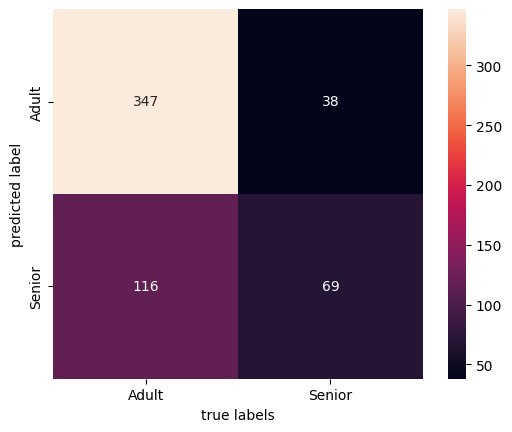

In [223]:
svc_mat = confusion_matrix(y_test,svc_pred)
sns.heatmap(svc_mat.T, square=True, annot=True, fmt="d", xticklabels=['Adult', 'Senior'],
                                      yticklabels=['Adult', 'Senior'])
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

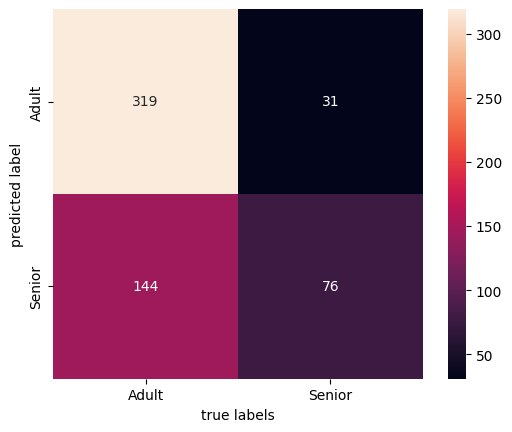

In [224]:
bbc_mat = confusion_matrix(y_test,bbc_pred)
sns.heatmap(bbc_mat.T, square=True, annot=True, fmt="d", xticklabels=['Adult', 'Senior'],
                                      yticklabels=['Adult', 'Senior'])
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

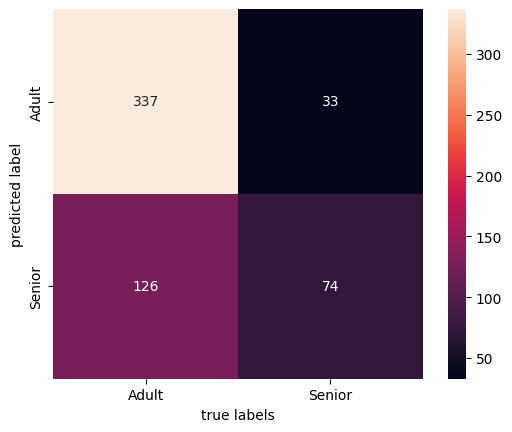

In [225]:
clf_mat = confusion_matrix(y_test,clf_pred)
sns.heatmap(clf_mat.T, square=True, annot=True, fmt="d", xticklabels=['Adult', 'Senior'],
                                      yticklabels=['Adult', 'Senior'])
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()